In [87]:
import matplotlib.pyplot as plt
from pygenometracks import tracks
import pandas as pd
import numpy as np
import bioframe as bf
import matplotlib
import matplotlib.patches as mpatches
import bbi

figure_width = 5

In [32]:
hmm_track = pd.read_csv('../annotations/GM12878_hg38_50kb.tsv', sep='\t')

In [33]:
# defining colors for plotting segmentation maps

names = {'HMM3': ['B', 'M', 'A', 'N','N'], 
         'HMM3P':['B', 'Mbb', 'M', 'Maa', 'A', 'N'],
         'binary':['B', 'A', 'N','N','N']
        }

nan_color = 5
pallete={ 'HMM3' :   np.array([0, 2, 4, nan_color, nan_color, nan_color]), 
          'HMM3P' :  np.array([0, 1, 2, 3, 4, nan_color]), 
          'binary' : np.array([0, 4, nan_color, nan_color, nan_color, nan_color])
         }

colordict={'B':'#74add1',
           'Mbb':'#e0f3f8',
           'M':'#ffffbf',
           'Maa':'#fdae61',
           'A':'#f46d43',
           'N':'#f8f8f8'}

def hex_to_rgb(hex_val):
    hex_val = hex_val.lstrip('#')
    hlen = len(hex_val)
    return tuple(int(hex_val[i:i+hlen//3], 16) for i in range(0, hlen, hlen//3))
   
cmap = np.array(list([ np.array(hex_to_rgb(colordict[key]))/255 for key in colordict.keys()]))

In [34]:
def track_to_mat(hmm_track, region, annotation_type, pallete, heatmap_width = 5, horizontal=True):
    y_sig = bf.select(hmm_track, region)[annotation_type].values
    mat = np.tile(y_sig.reshape(1,-1), (heatmap_width, 1))
    mat[np.isnan(mat)] = nan_color
    mat = mat.astype(int)
    mat_c = pallete[annotation_type][mat]
    if not horizontal:
        mat_c = mat_c.T
    return mat_c

def plot_track(hmm_track, region, annotation_type, pallete):
    plt.figure(figsize=(figure_width, figure_width/10))
    mat_c = track_to_mat(hmm_track, region, annotation_type, pallete, horizontal=True)
    im = plt.imshow(mat_c,cmap=matplotlib.colors.ListedColormap(cmap), vmin=0, vmax=5, aspect='auto')
    
    # handling the legend
    values = pallete[annotation_type]
    colors = [ im.cmap(im.norm(value)) for value in values]
    patches = [ mpatches.Patch(color=colors[i], label=names[annotation_type][i] ) 
               for i in range(len(np.unique(names[annotation_type])) )]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.axis('off');

In [108]:
def bwselect(path, region):
    bw = bf.read_bigwig(path=path, chrom=region1.split(":")[0])
    return bf.select(bw, region)

In [112]:
bw_path = '../data/bigwigs/'

In [283]:
bigwigs = { 'H3K27me3': 'ENCFF313LYI'
          ,'H3K27ac':'ENCFF340JIF'
           ,'H3K4me3': 'ENCFF583MDQ'
           ,'ATF2':'ENCFF732LDY'
           ,'CBX3': 'ENCFF741ZGT'
           ,'FOXK2': 'ENCFF291BKK'
           ,'USF1': 'ENCFF344JQP'
           , 'TAF1': 'ENCFF105MPH'
           , 'CTCF': 'ENCFF852CRG'
            }

In [303]:
region1 = 'chr1:105,500,000-120,500,000'
annotation_type1 = 'binary'
mat1 = track_to_mat(hmm_track, region1, annotation_type1, pallete, heatmap_width = 5, horizontal=True)
annotation_type1 = 'HMM3P'
mat2 = track_to_mat(hmm_track, region1, annotation_type1, pallete, heatmap_width = 5, horizontal=True)
# bw1 = bwselect(bw_path + bigwigs['H3K27me3']+'.bigWig', region1)
# bw2 = bwselect(bw_path + bigwigs['H3K27ac']+'.bigWig', region1)

In [304]:
from pygenometracks import tracks

In [305]:
def get_bwtrack(path):
    properties_dict = {'file':path, 
                       'height': 3, 'title':'bigwig', 'color':'green'}
    bw = tracks.BigWigTrack(properties_dict)
    return bw

In [326]:
bt = tracks.BedTrack(
{'file':'/pollard/data/wynton/consortia/roadmap/byFileType/chromhmmSegmentations/ChmmModels/coreMarks/jointModel/final/E116_15_coreMarks_hg38lift_dense.bed.gz'
 ,'height': 3
 , 'title':'bed6 border_color = black; fontsize=8; color=red', 
 
 'color':'bed_rgb', 'border_color': 'black', 'fontsize':8, 'display':'collapsed'})

100%|██████████| 473498/473498 [00:30<00:00, 15612.87it/s]


In [306]:
bw1 = get_bwtrack(bw_path + bigwigs['H3K27me3']+'.bigWig')
bw2 = get_bwtrack(bw_path + bigwigs['H3K27ac']+'.bigWig')
bw3 = get_bwtrack(bw_path + bigwigs['CTCF']+'.bigWig')

In [307]:
s = region1.split(':')
se = s[1].split('-')
chrom, start, end = s[0], int(''.join(se[0].split(','))), int(''.join(se[1].split(',')))

DEBUG:pygenometracks.tracks.GenomeTrack:ylim 2.08,-0.08


(0.0, 10.0)

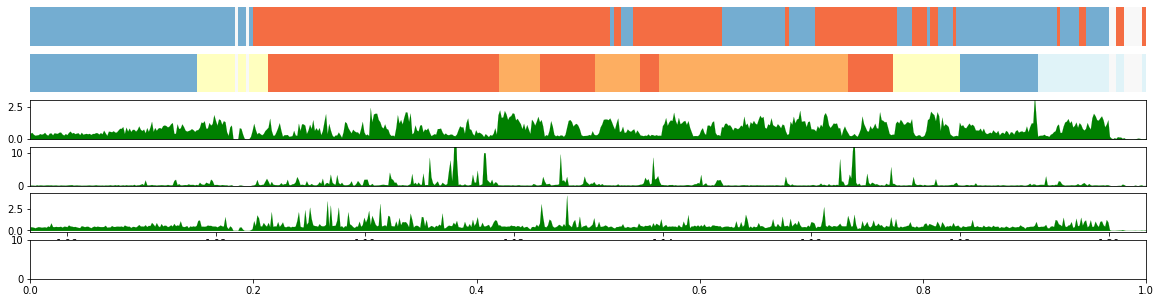

In [323]:


# to plot the region two axes are needed, one for the plot itself and the other for the legend.
figure, ax = plt.subplots(6, 1, figsize=(20, 5))



ax[0].imshow(mat1,cmap=matplotlib.colors.ListedColormap(cmap), vmin=0, vmax=5, aspect='auto')
ax[0].axis('off')
ax[1].imshow(mat2,cmap=matplotlib.colors.ListedColormap(cmap), vmin=0, vmax=5, aspect='auto')
ax[1].axis('off')

bw1.plot(ax[2], chrom, start, end)
ax[2].margins(0)
ax[2].set_xticks([])
ax[2].set_ylim([0,3])

bw2.plot(ax[3], chrom, start, end)
ax[3].margins(0)
ax[3].set_xticks([])
ax[3].set_ylim([0,12])

bw3.plot(ax[4], chrom, start, end)
ax[4].margins(0)
# ax[4].set_ylim([0,1])

bt.plot(ax[5], chrom, start, end)
ax[5].set_ylim([0, 10])

In [328]:
import pygbrowse

